# 필요한 패키지 import
- kiwi 형태소 분석기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# !pip install kiwi
# !pip install kiwipiepy
# !pip install pandas scikit-learn matplotlib wordcloud konlpy
# !pip install kiwi-python
# !pip install kiwi-kr

In [3]:
import json
from kiwipiepy import Kiwi

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [19]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [5]:
plt.rc('font', family='NanumBarunGothic')

# 수행과정
- 구축해놓은 국방 전용 말뭉치 사전을 통해 kiwi 형태소 분석기를 학습
- 학습된 Kiwi로 '용례'에 대해 형태소 분석
- 9개의 무기체계 세부항목별 용례의 워드클라우드를 통해 키워드 파악
- 세부항목 : 개인화기, 기타무기, 무기 및 병기공학 일반, 미사일, 우주무기, 육상병기, 폭탄 및 핵무기, 항공병기, 해상병기

# KIWI 학습
- 국방전용 말뭉치 사전의 '용어' 칼럼을 add_user_word()로 학습

In [6]:
# 1. 말뭉치.json 파일 로드
with open('/content/drive/MyDrive/크롤링프로젝트_정리본/말뭉치사전/말뭉치사전.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# 2. Kiwi 초기화
kiwi = Kiwi()

# 3. 각 용어에 대해 형태소 분석을 실행하고, 사용자 사전에 추가하기
for item in data:
    term = item['용어']
    category = item['분야']
    sub_category = item['세부항목']
    definition = item['설명']
    source = item['출처']
    examples = item['용례리스트']
    example_sources = item['용례출처리스트']

    # 4. 용어를 사용자 사전에 하나씩 추가
    kiwi.add_user_word(term, tag='NNP')  # 고유명사로 등록

    # 5. 형태소 분석 실행
    result = kiwi.analyze(term)

    # 형태소 분석 결과 출력
    print("형태소 분석 결과:")
    for word, tag in result:
        print(f"({word}, {tag})")

    print("="*50)  # 구분선


형태소 분석 결과:
([Token(form='45형 데어링급 구축함', tag='NNP', start=0, len=12)], -12.459455490112305)
형태소 분석 결과:
([Token(form='5세대 전투기', tag='NNP', start=0, len=7)], -12.459455490112305)
형태소 분석 결과:
([Token(form='5호 전차 판터', tag='NNP', start=0, len=8)], -12.459455490112305)
형태소 분석 결과:
([Token(form='99식 소총', tag='NNP', start=0, len=6)], -12.459455490112305)
형태소 분석 결과:
([Token(form='A-10', tag='NNP', start=0, len=4)], -12.459455490112305)
형태소 분석 결과:
([Token(form='A-4 스카이호크 공격기', tag='NNP', start=0, len=13)], -12.459455490112305)
형태소 분석 결과:
([Token(form='A-6 인트루더', tag='NNP', start=0, len=8)], -12.459455490112305)
형태소 분석 결과:
([Token(form='AC-130 건십', tag='NNP', start=0, len=9)], -12.459455490112305)
형태소 분석 결과:
([Token(form='AGM-86', tag='NNP', start=0, len=6)], -12.459455490112305)
형태소 분석 결과:
([Token(form='AH-1Z 바이퍼', tag='NNP', start=0, len=9)], -12.459455490112305)
형태소 분석 결과:
([Token(form='AIR-2 지니', tag='NNP', start=0, len=8)], -12.459455490112305)
형태소 분석 결과:
([Token(form='AK', tag='SL', start=0, l

## 결과
: 띄어쓰기가 있는 국방 용어를 하나의 단어로 인식 가능하게함
- 기존 kiwi : 국방 용어인 '현무 미사일' => 현무, 미사일 로 토큰화
- 학습된 kiwi : 국방 용어인 '현무 미사일' => [현무 미사일] 한 단어로 인식

- 기존 kiwi 형태소 분석기

In [7]:
# 1. Kiwi 초기화
kiwi = Kiwi()

sentence = "대한민국의 흑표 전차는 T-50 전차와 함께 우수한 열차포의 성능을 가지고, 현무 미사일도 있습니다."
result = kiwi.analyze(sentence)
print(result)

[([Token(form='대한민국', tag='NNP', start=0, len=4), Token(form='의', tag='JKG', start=4, len=1), Token(form='흑표', tag='NNP', start=6, len=2), Token(form='전차', tag='NNG', start=9, len=2), Token(form='는', tag='JX', start=11, len=1), Token(form='T', tag='SL', start=13, len=1), Token(form='-', tag='SO', start=14, len=1), Token(form='50', tag='SN', start=15, len=2), Token(form='전차', tag='NNG', start=18, len=2), Token(form='와', tag='JKB', start=20, len=1), Token(form='함께', tag='MAG', start=22, len=2), Token(form='우수', tag='NNG', start=25, len=2), Token(form='하', tag='XSA', start=27, len=1), Token(form='ᆫ', tag='ETM', start=27, len=1), Token(form='열차포', tag='NNP', start=29, len=3), Token(form='의', tag='JKG', start=32, len=1), Token(form='성능', tag='NNG', start=34, len=2), Token(form='을', tag='JKO', start=36, len=1), Token(form='가지', tag='VV', start=38, len=2), Token(form='고', tag='EC', start=40, len=1), Token(form=',', tag='SP', start=41, len=1), Token(form='현무', tag='NNG', start=43, len=2), Toke

- 학습시킨 kiwi

In [8]:
with open('/content/drive/MyDrive/크롤링프로젝트_정리본/말뭉치사전/말뭉치사전.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

custom_words = [(item["용어"], "NNP") for item in data]

for word, tag in custom_words:
    try:
        kiwi.add_user_word(word, tag)
    except Exception as e:
        print(f"단어 추가 실패: {word} -> {e}")

- 결과
: '현무 미사일' , '5세대 전투기', '알레이버크급 구축함' 모두 하나의 단어로 인식

In [9]:
sentence = "대한민국의 흑표 전차는 T-50 전차와 함께 우수한 열차포의 성능을 가지고, 현무 미사일과 5세대 전투기와 알레이버크급 구축함도 있습니다."
result = kiwi.analyze(sentence)

print("형태소 분석 결과:")
for token in result[0][0]:
    print(f"{token.form} ({token.tag})")

형태소 분석 결과:
대한민국 (NNP)
의 (JKG)
흑표 (NNP)
전차 (NNG)
는 (JX)
T-50 (NNP)
전 (MM)
차 (NNG)
와 (JKB)
함께 (MAG)
우수 (NNG)
하 (XSA)
ᆫ (ETM)
열차포 (NNP)
의 (JKG)
성능 (NNG)
을 (JKO)
가지 (VV)
고 (EC)
, (SP)
현무 미사일 (NNP)
과 (JC)
5세대 전투기 (NNP)
와 (JC)
알레이버크급 구축함 (NNP)
도 (JX)
있 (VV)
습니다 (EF)
. (SF)


# 세부항목별 워드클라우드


## 용례 토큰화
- 학습된 kiwi를 가지고 세부항목별 용례 토큰화
- Counter : 세부항목마다 토큰별 빈도 계산

In [10]:
example = pd.read_csv('/content/drive/MyDrive/크롤링프로젝트_정리본/용례테이블/용례테이블.csv')

- 학습된 kiwi 토크나이저 함수
: 용례를 토큰화한 후, 고유명사만 추출

In [11]:
def kiwi_tokenizer(text):
    result = kiwi.analyze(text)[0][0]
    return [token.form for token in result
            if token.tag in ['NNP']]

In [12]:
# from collections import Counter

rows = []

for category, group in example.groupby('세부항목'):
    # 카테고리 안의 모든 용례 텍스트에서 토큰 추출
    tokens = []
    for text in group['용례'].astype(str):
        tokens.extend(kiwi_tokenizer(text))  # 사용자 사전이 반영된 명사 토크나이저

    # 빈도 계산
    freqs = Counter(tokens)

    # rows 리스트에 dict 형태로 추가
    for token, cnt in freqs.items():
        rows.append({
            '세부항목': category,
            'token': token,
            'count': cnt
        })

# DataFrame으로 변환
df_counts = pd.DataFrame(rows)

## 결과
- 세부항목별 용례에서 추출한 토큰의 빈도수를 나타냄

In [13]:
df_counts

,세부항목,token,count
0,개인화기,북한,3
1,개인화기,RPG-7,58
2,개인화기,조병창,12
3,개인화기,M16 소총,59
4,개인화기,M60 기관총,26
...,...,...,...
4572,해상병기,참수리-211,3
4573,해상병기,대만,1
4574,해상병기,스코트,1
4575,해상병기,키드급 구축함,3


In [14]:
# count 기준으로 정렬
df_counts = df_counts.sort_values(['세부항목','count'], ascending=[True, False])

# CSV로 저장
df_counts.to_csv('/content/drive/MyDrive/크롤링프로젝트_정리본/세부항목별_wordcloud_시각화.csv', index=False, encoding='utf-8-sig')

## 워드클라우드 시각화

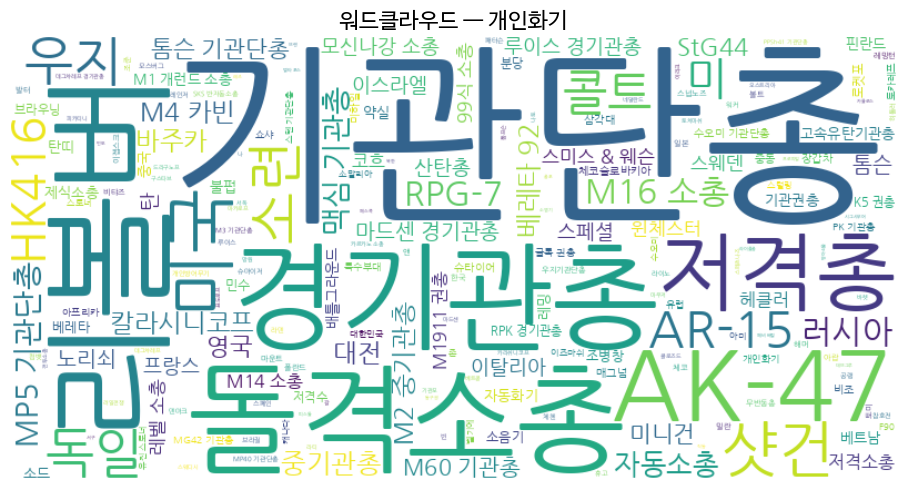

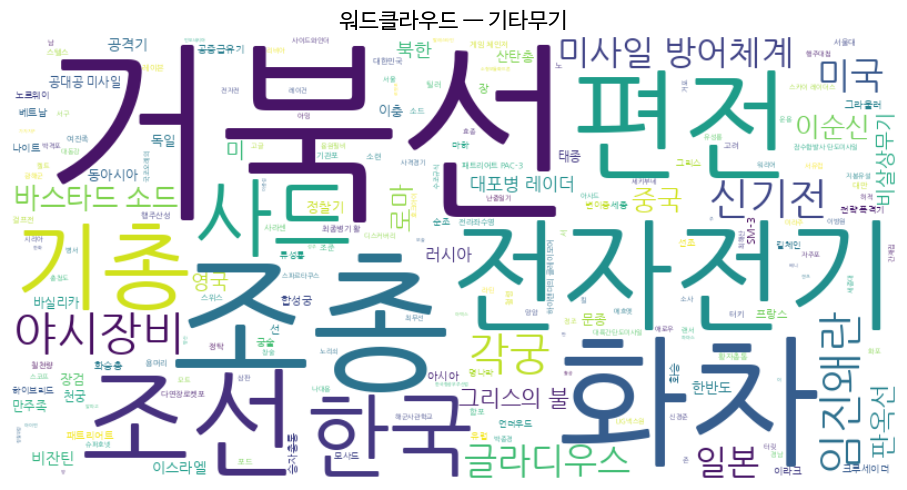

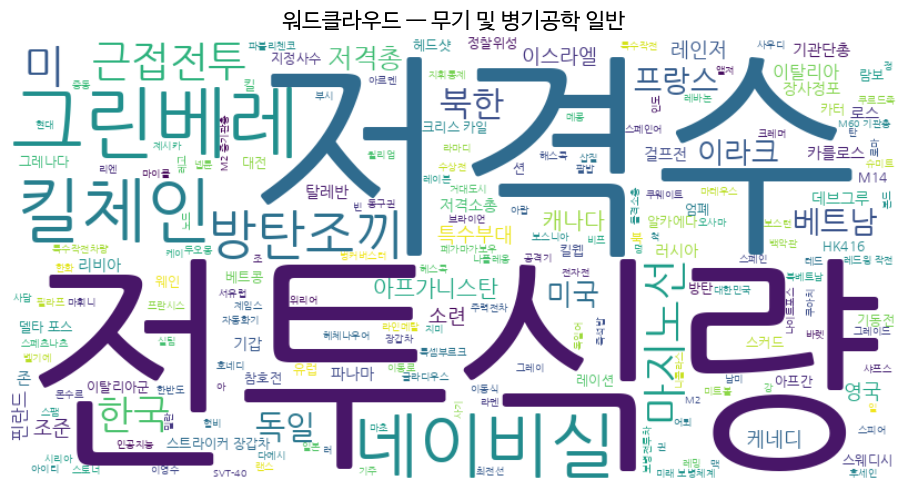

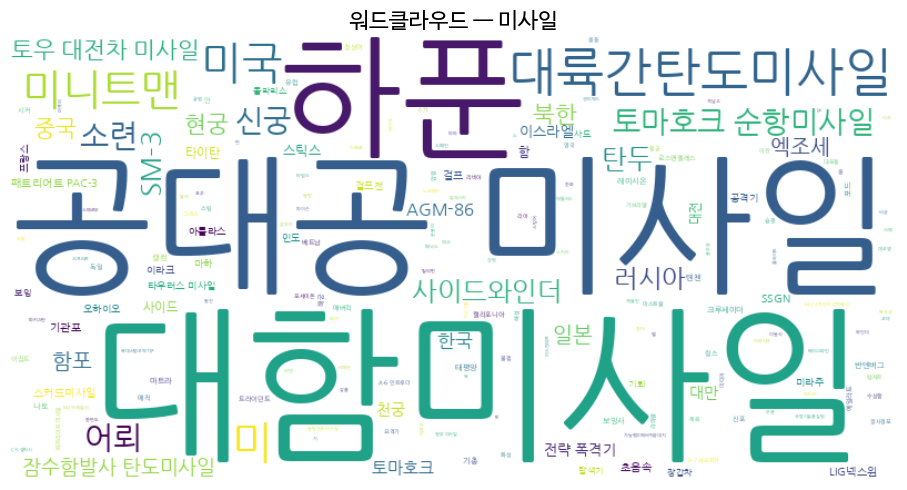

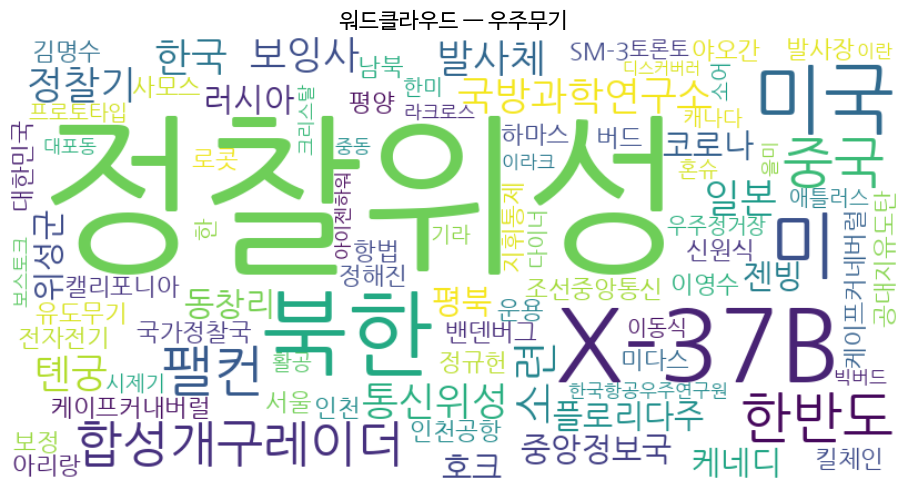

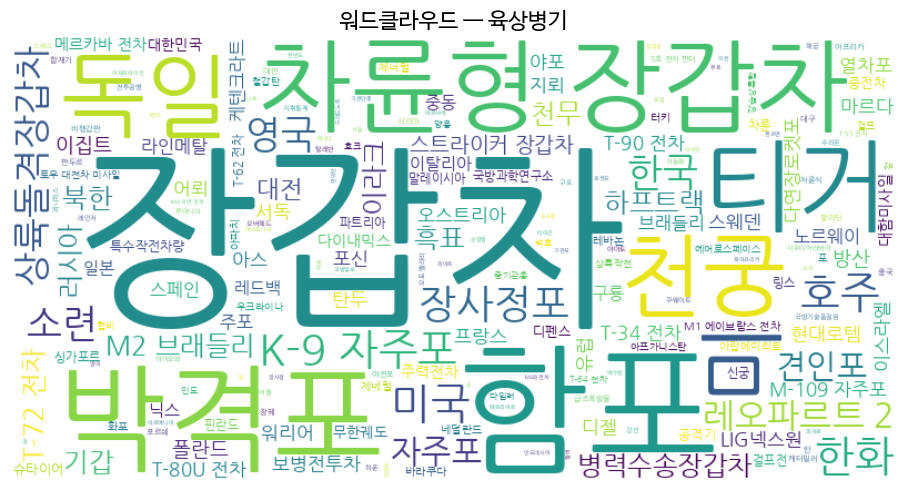

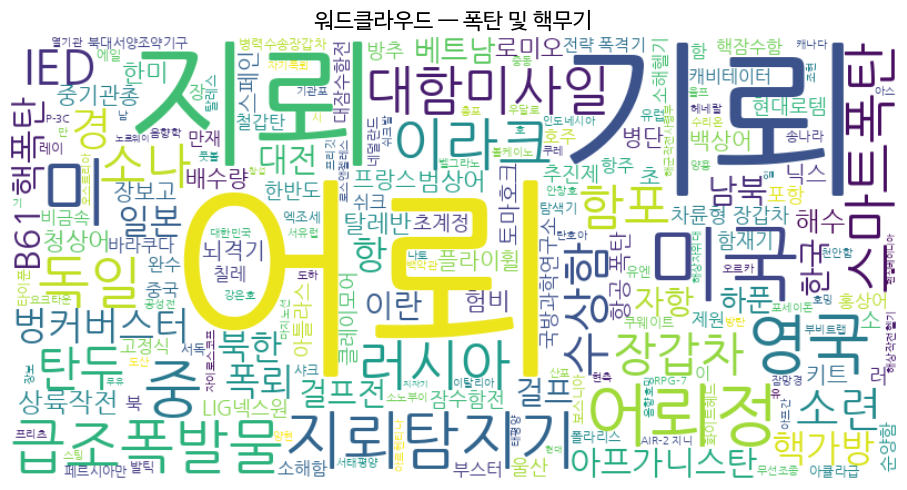

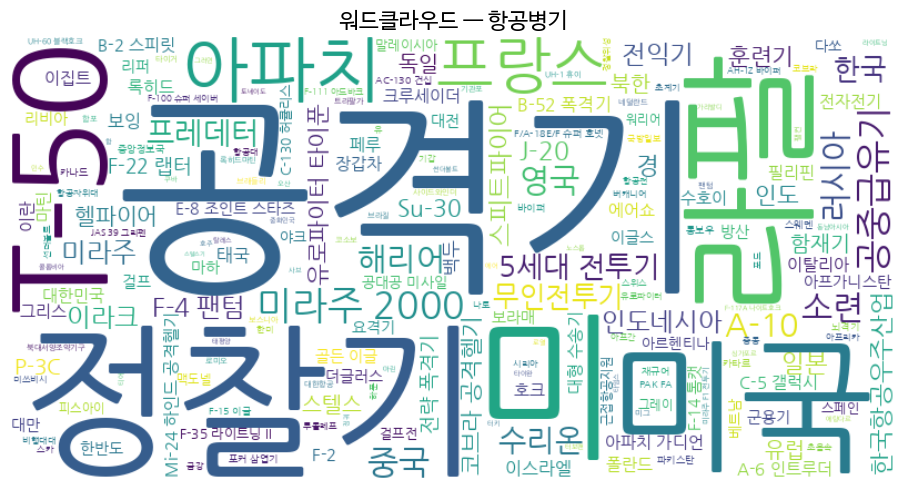

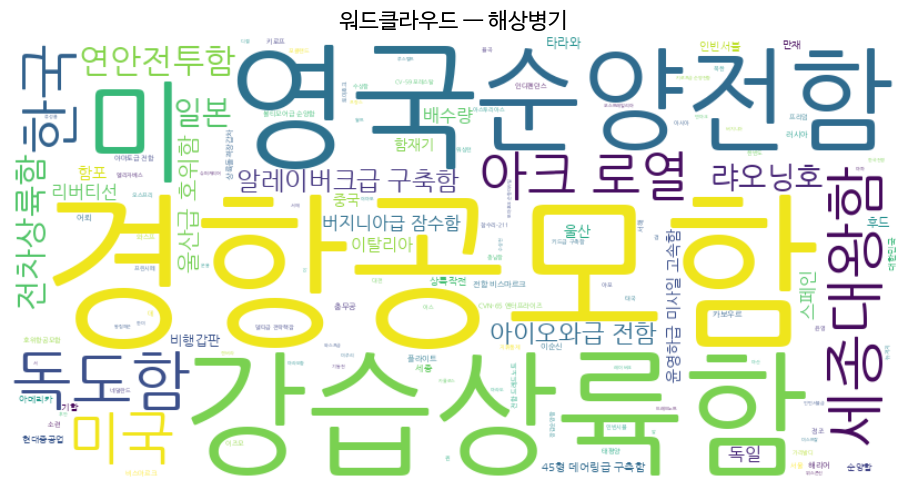

In [15]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

#  세부항목별로 워드클라우드 생성
for category, grp in df_counts.groupby('세부항목'):
    # token–count dict 만들기
    freqs = dict(zip(grp['token'], grp['count']))

    # WordCloud 생성 (한글 폰트 경로는 환경에 맞게 수정)
    wc = WordCloud(
        font_path='/content/drive/MyDrive/fonts/NanumGothic.ttf',
        width=800, height=400,
        background_color='white'
    ).generate_from_frequencies(freqs)

    # 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'워드클라우드 — {category}', fontsize=16)
    plt.tight_layout()
    plt.show()